In [114]:
import os
import csv
import fitz  
import pypdfium2 as pdfium
import pdftotext  
from tika import parser  
import time
import matplotlib.pyplot as plt
import numpy as np
import logging

In [115]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [116]:
def process_pdfs_pymupdf(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                
                doc = fitz.open(pdf_path)
                text = ""
                for page_num in range(len(doc)):
                    page = doc.load_page(page_num)
                    text += page.get_text()
                elapsed_time = time.time() - start_time

                data.append([pdf_id, text, class_name])
                pdf_id += 1
                total_time += elapsed_time

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    return total_time

In [117]:
def process_pdfs_pypdfium2(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                
                pdf = pdfium.PdfDocument(pdf_path)
                text = ""
                for page_num in range(len(pdf)):
                    page = pdf.get_page(page_num)
                    text += page.get_textpage().get_text_range()
                elapsed_time = time.time() - start_time

                data.append([pdf_id, text, class_name])
                pdf_id += 1
                total_time += elapsed_time

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    return total_time


In [118]:
def process_pdfs_pdftotext(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                
                with open(pdf_path, "rb") as f:
                    pdf = pdftotext.PDF(f)
                text = "\n\n".join(pdf)
                elapsed_time = time.time() - start_time

                data.append([pdf_id, text, class_name])
                pdf_id += 1
                total_time += elapsed_time

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    return total_time


In [119]:
def process_pdfs_tika(base_directory, output_csv):
    data = []
    pdf_id = 1
    total_time = 0

    for subdir, _, files in os.walk(base_directory):
        class_name = os.path.basename(subdir)

        for filename in files:
            if filename.endswith(".pdf"):
                pdf_path = os.path.join(subdir, filename)

                start_time = time.time()
                
                raw = parser.from_file(pdf_path)
                text = raw['content']
                elapsed_time = time.time() - start_time

                data.append([pdf_id, text, class_name])
                pdf_id += 1
                total_time += elapsed_time

    with open(output_csv, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "text", "class"])
        writer.writerows(data)
    return total_time


In [120]:
def plot_execution_times(results):
    libraries = [result[0] for result in results]
    times = [result[1] for result in results]
    sorted_data = sorted(zip(libraries, times), key=lambda x: x[1])
    libraries_sorted, times_sorted = zip(*sorted_data)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(libraries_sorted)))
    bars = plt.bar(libraries_sorted, times_sorted, color=colors)
    for bar, time in zip(bars, times_sorted):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{time:.2f} s', ha='center', va='bottom', fontsize=8)
    plt.xlabel('Bibliotecas')
    plt.ylabel('Tempo de Execução (segundos)')
    plt.title('Tempo de Execução das Bibliotecas de Processamento de PDF')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [121]:
results = []

timemu = process_pdfs_pymupdf("data", "csv/output_pymupdf.csv")
results.append(('pymupdf', timemu))

timefium = process_pdfs_pypdfium2("data", "csv/output_pypdfium2.csv")
results.append(('pypdfium2', timefium))

timepdfto = process_pdfs_pdftotext("data", "csv/output_pdftotext.csv")
results.append(('pdftotext', timepdfto))

timetika = process_pdfs_tika("data", "csv/output_tika.csv")
results.append(('tika', timetika))

/home/vini/Documentos/cv_classifier/.venv/lib/python3.12/site-packages/pypdfium2/_helpers/textpage.py:80: UserWarning: get_text_range() call with default params will be implicitly redirected to get_text_bounded()
  warnings.warn("get_text_range() call with default params will be implicitly redirected to get_text_bounded()")


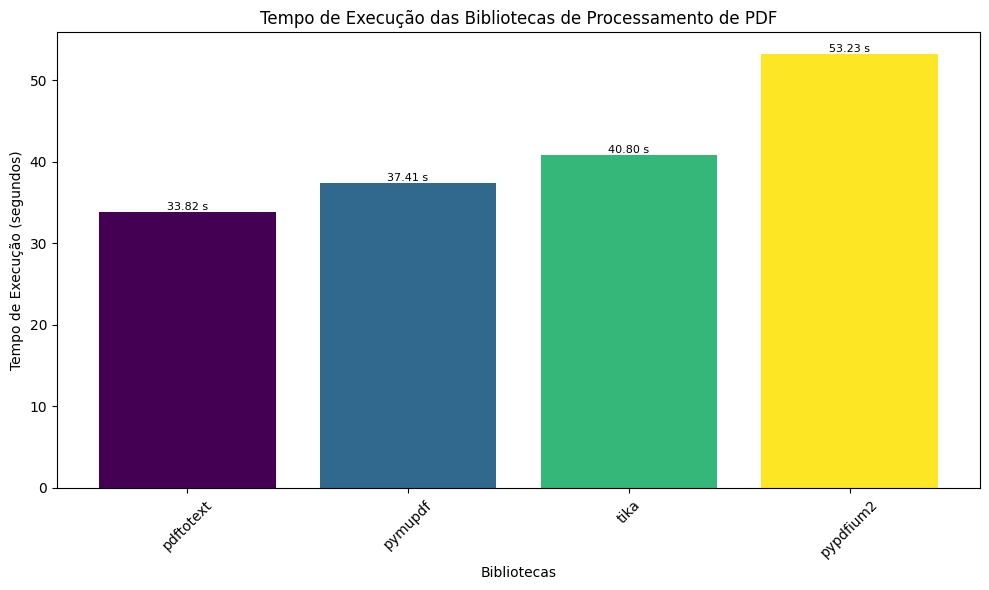

In [122]:
plot_execution_times(results)